# Cross validation

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import train_test_split
%matplotlib inline 
#Don't use this command in canopy or in python

path = 'data/adult.csv'
data = pd.read_csv(path)
# remove rows where occupation is unknown
data = data[data.occupation != '?']
raw_data = data[data.occupation != '?']

In [30]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [31]:
#First we need to create dummy variables
data['workclass_num'] = data.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
data['over50K'] = np.where(data.income == '<=50K', 0, 1)
data['marital_num'] = data['marital.status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
data['race_num'] = data.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
data['sex_num'] = np.where(data.sex == 'Female', 0, 1)
data['rel_num'] = data.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356,18,United-States,<=50K,0,0,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900,40,United-States,<=50K,0,0,1,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900,40,United-States,<=50K,0,0,2,0,0,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,3770,45,United-States,<=50K,0,0,1,0,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,3770,40,United-States,<=50K,0,0,2,0,1,0


In [32]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356,18,United-States,<=50K,0,0,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900,40,United-States,<=50K,0,0,1,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900,40,United-States,<=50K,0,0,2,0,0,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,3770,45,United-States,<=50K,0,0,1,0,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,3770,40,United-States,<=50K,0,0,2,0,1,0


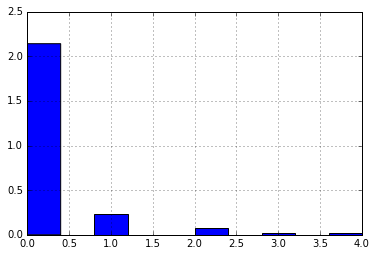

In [33]:
data.race_num.hist(normed = 1)

The dataset is mostly composed of white people (1994)

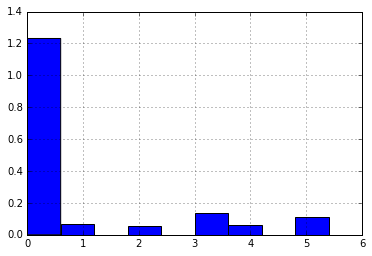

In [34]:
data.workclass_num.hist(normed = 1)

In [41]:
X = data[['workclass_num', 'education.num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']]
y = data.over50K
# fit an Extra Tree model to the data
logr = LogisticRegression()
logr.fit(X, y)
# display the relative importance of each attribute
relval = logr.coef_[0]
print relval

[  1.48590902e-02   3.52480852e-01  -3.63766335e-01  -1.71074311e-01
   3.29860790e-01   3.06367805e+00   3.24647793e-04   6.86984115e-04]


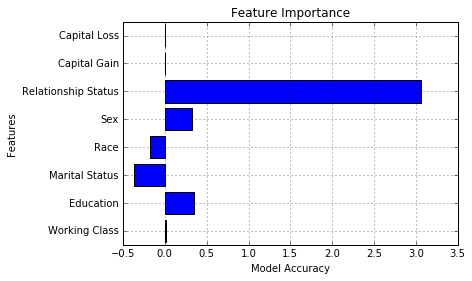

In [43]:
# horizontal bar plot of feature importance
pos = np.arange(8) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Working Class', 'Education', 'Marital Status', 'Race', 'Sex', 'Relationship Status', 'Capital Gain', 'Capital Loss'))
plt.grid(True)

# Vanilla Cross Validation

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13) #deaults at 25% for the test size
logr = LogisticRegression(penalty = 'l2')


In [59]:
c_list = np.logspace(-3, 10, num=100)

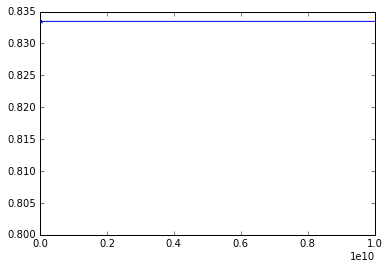

In [61]:
ac_list = []
for c_val in c_list:
    logr.C = c_val
    logr.fit(X_train, y_train)
    y_pred = logr.predict(X_test)
    ac_list.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(c_list, ac_list)

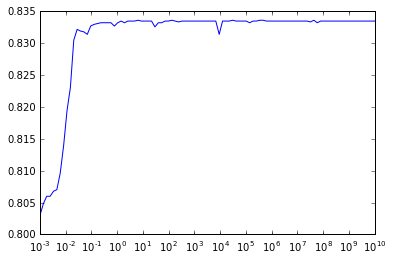

In [63]:
plt.semilogx(c_list, ac_list)

# No Free Lunch Theorem

There isn't a single set of parameters that will work for every single dataset. The parameter C that we just obtained might not work for a different dataset.


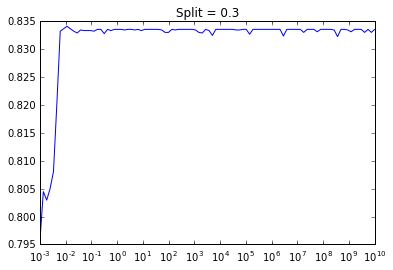

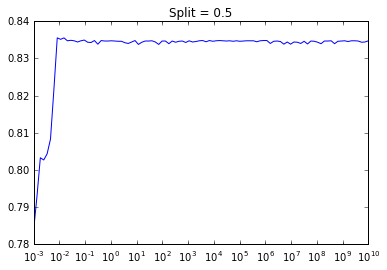

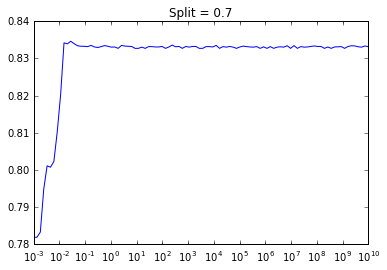

In [71]:
logr = LogisticRegression(penalty = 'l1')
for test_split in [0.3, 0.5, 0.7]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_split, random_state=13)
        ac_list = []
        for c_val in c_list:
            logr.C = c_val
            logr.fit(X_train, y_train)
            y_pred = logr.predict(X_test)
            ac_list.append(metrics.accuracy_score(y_test, y_pred))
        plt.figure()
        plt.semilogx(c_list, ac_list)
        title = 'Split = '+str(test_split)
        plt.title(title)

# K-Fold Cross Validation

In [92]:
kf = KFold(len(data), n_folds=3, shuffle=False)
logr = LogisticRegression(penalty = 'l1')
c_list = np.logspace(-3, 10, num=5)
cross_val_score(logr, X, y, cv=kf)

array([ 0.76552734,  0.84285575,  0.83709347])

In [93]:
print np.mean(cross_val_score(logr, X, y, cv=kf, n_jobs = -1))

0.815712291977


0.001
1.77827941004
3162.27766017
5623413.2519
10000000000.0


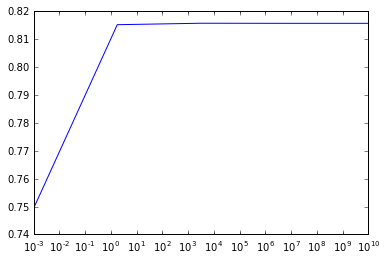

In [105]:
ac_list = []
for c_val in c_list:
    print c_val
    logr.C = c_val
    logr.fit(X_train, y_train)
    y_pred = logr.predict(X_test)
    ac_list.append(cross_val_score(logr, X, y, cv=kf, n_jobs = -1).mean())
plt.semilogx(c_list, ac_list)

In [109]:
logr = LogisticRegressionCV(c_list, cv = 3, n_jobs = -1)
logr.fit(X, y)

LogisticRegressionCV(Cs=array([  1.00000e-03,   1.77828e+00,   3.16228e+03,   5.62341e+06,
         1.00000e+10]),
           class_weight=None, cv=3, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=-1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [110]:
logr.C_

array([ 3162.27766017])